In [1]:
%matplotlib inline
%pylab inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pd.read_csv('data/diamonds.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
train=train.drop(columns=['Unnamed: 0'])

In [7]:
train.shape

(53940, 10)

In [16]:
train.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
# slice data into features and target
X = train.loc[:,['carat','depth','x','y','z']]
y = train.loc[:,"price"].astype(float)
X.head(10)

,carat,depth,x,y,z
0,0.23,61.5,3.95,3.98,2.43
1,0.21,59.8,3.89,3.84,2.31
2,0.23,56.9,4.05,4.07,2.31
3,0.29,62.4,4.20,4.23,2.63
4,0.31,63.3,4.34,4.35,2.75
5,0.24,62.8,3.94,3.96,2.48
6,0.24,62.3,3.95,3.98,2.47
7,0.26,61.9,4.07,4.11,2.53
8,0.22,65.1,3.87,3.78,2.49
9,0.23,59.4,4.00,4.05,2.39


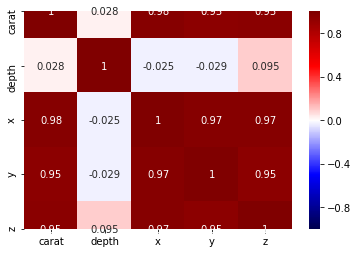

In [9]:

sns.heatmap(X.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

In [22]:
# fit model with target as housing price index
diamonds_model = sm.OLS(y, X, data=train)

results = diamonds_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          1.343e+05
Date:                Mon, 23 Mar 2020   Prob (F-statistic):                        0.00
Time:                        17:56:17   Log-Likelihood:                     -4.7199e+05
No. Observations:               53940   AIC:                                  9.440e+05
Df Residuals:                   53935   BIC:                                  9.440e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9647.1551     57.315    168.318      0.000    9534.817    9759.493
depth         14.5314      1.530      9.498      0.000      11.533      17.530
x           -629.0803     37.687    -16.692      0.000    -702.947    -555.214
y            177.6423     25.912      6.856      0.000     126.855     228.430
z           -587.6431     40.613    -14.469      0.000    -667.246    -508.040
==============================================================================
Omnibus:                    14389.673   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           283272.024
Skew:                           0.795   Prob(JB):                         0.00
Kurtosis:                      14.114   Cond. No.                         583.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

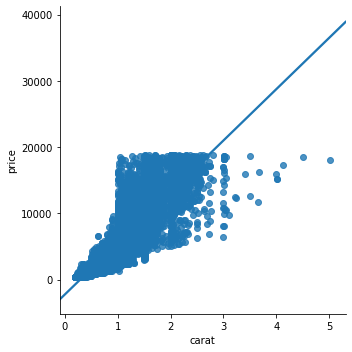

In [28]:
sns.lmplot(x="carat", y="price", data=train)
#sns.regplot(x="carat", y="price", data=train)

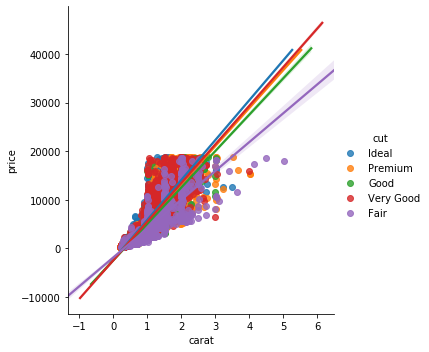

In [32]:
sns.lmplot(x="carat", y="price", hue="cut", data=train)

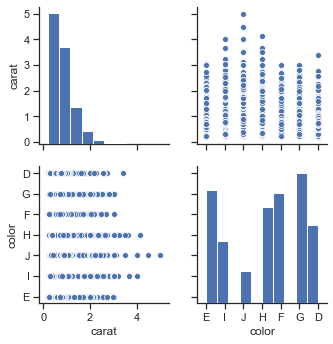

In [41]:
sns.pairplot(train, vars=["carat", "color"])

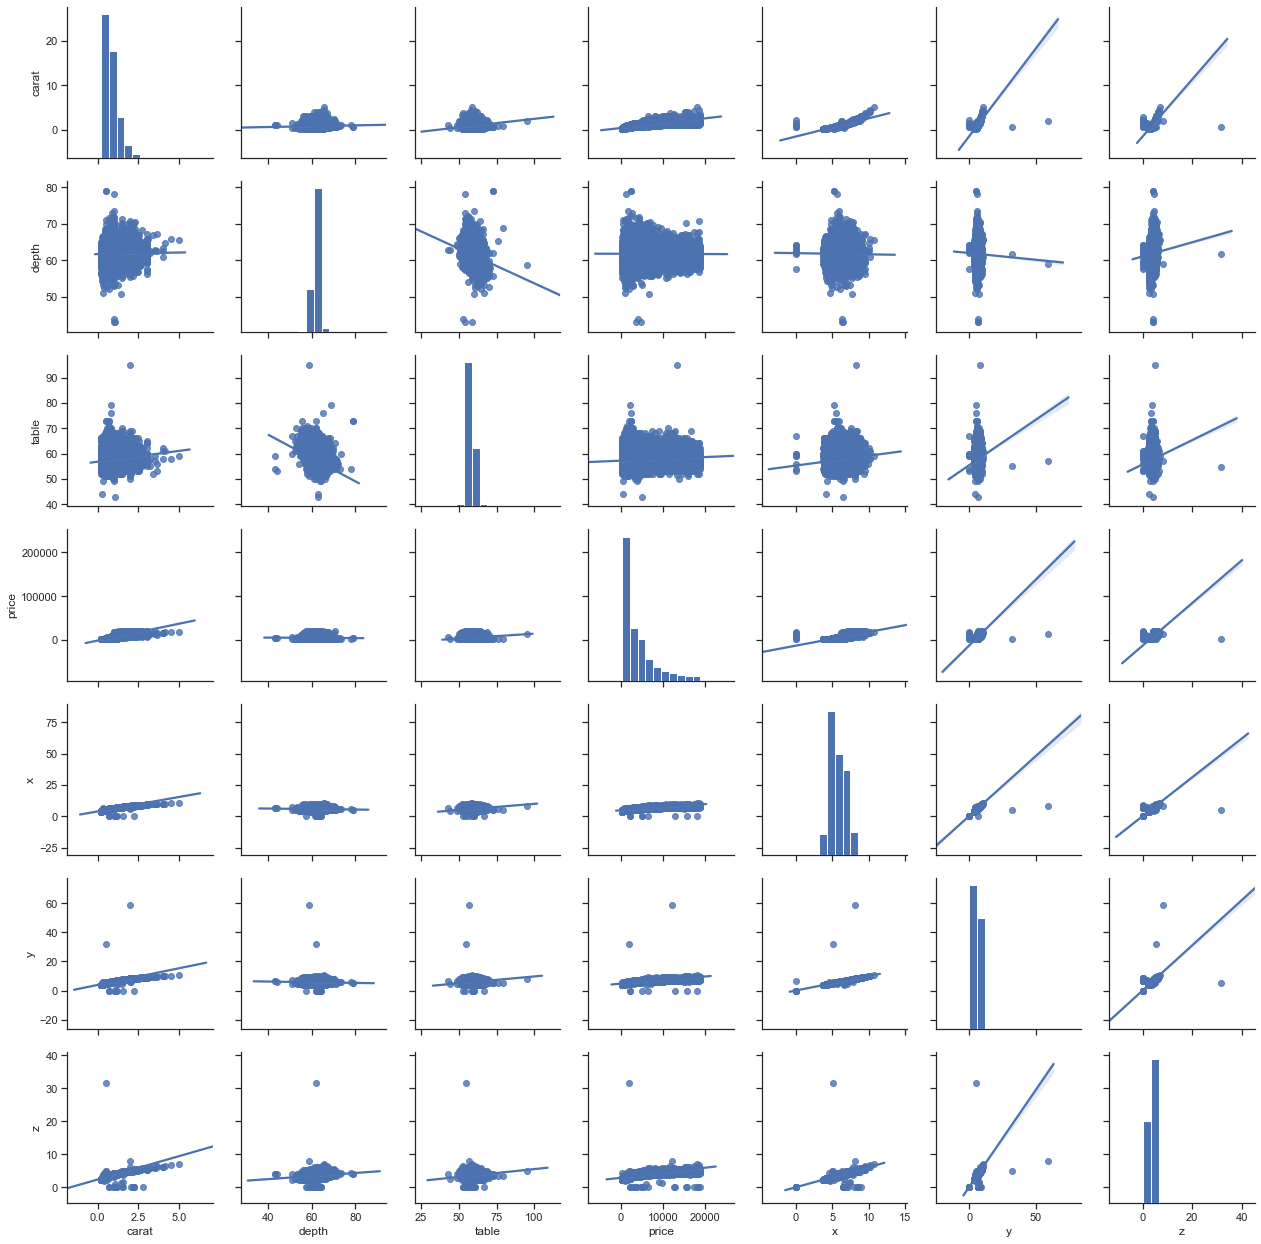

In [42]:
sns.pairplot(train, kind="reg")

In [29]:
# linear regression algoritmasını sklearn kütüphanesinden yüklüyoruz.

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

#CV işlemleri için böl

X = train.loc[:,['carat','depth','x','y','z']]

x_train, x_cv, y_train, y_cv = train_test_split(X,train.price,test_size=.2, random_state=10)

In [30]:
#Modelimizi eğitebiliriz.

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

#Hataların karesel ortalamasına bakıyoruz
mse = np.mean((pred - y_cv)**2)

#modelin score r2

lreg.score(x_cv, y_cv)
#bu iki kolonla %36 ancak kotu ve yetersiz.

0.8546262326417882

In [31]:
mse

2376032.240913433

In [45]:
# Katsayılara bir göz atalım(Yani denklemdeki thetalarımız)
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff


,0,Coefficient Estimate
0,carat,10557.593415
1,depth,-108.469212
2,x,-1225.232115
3,y,23.478467
4,z,71.837797
5,cut_Fair,-1043.767955
6,cut_Good,-42.841891
7,cut_Ideal,585.315007
8,cut_Premium,196.982162
9,cut_VeryGood,304.312676


In [33]:
#object tiplerin tekilliklerini kontrol modele dahil edilebilme olasılıklarına bakıyoruz
train['cut'].nunique()

5

In [34]:
train['color'].nunique()

7

In [35]:
train['clarity'].nunique()

8

In [36]:
train = pd.get_dummies(train, columns=['cut'])
train.head(3)

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,1,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,2,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,3,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0


In [39]:
train.rename(columns={'cut_Very Good': 'cut_VeryGood'},inplace=True)
train.head()

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_VeryGood
0,1,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,2,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,3,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,4,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,5,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0


In [41]:
X = train.loc[:,['carat','depth','x','y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_VeryGood']]

x_train, x_cv, y_train, y_cv = train_test_split(X,train.price,test_size=.2, random_state=10)

In [42]:
lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

#Hataların karesel ortalamasına bakıyoruz
mse = np.mean((pred - y_cv)**2)

#modelin score r2

lreg.score(x_cv, y_cv)
#bu iki kolonla %57 cıkardık 

0.8599016254533602

In [43]:
mse

2289809.6463452335

In [44]:
# Şimdi Katsayıları kontrol edelim bakalım nasıl bir korelasyon ilişkileri var.
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,carat,10557.593415
1,depth,-108.469212
2,x,-1225.232115
3,y,23.478467
4,z,71.837797
5,cut_Fair,-1043.767955
6,cut_Good,-42.841891
7,cut_Ideal,585.315007
8,cut_Premium,196.982162
9,cut_VeryGood,304.312676


In [46]:
#Son duruma göre R-Square değerimize bakalım ve tahmin yeteneğimizin ne kadar olduğunu görelim.

lreg.score(x_cv, y_cv)

0.8599016254533602

In [48]:
train = pd.get_dummies(train, columns=['color'])
train.head(3)

,Unnamed: 0,carat,clarity,depth,table,price,x,y,z,cut_Fair,...,cut_Ideal,cut_Premium,cut_VeryGood,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1,0.23,SI2,61.5,55.0,326,3.95,3.98,2.43,0,...,1,0,0,0,1,0,0,0,0,0
1,2,0.21,SI1,59.8,61.0,326,3.89,3.84,2.31,0,...,0,1,0,0,1,0,0,0,0,0
2,3,0.23,VS1,56.9,65.0,327,4.05,4.07,2.31,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
X = train.loc[:,['carat','depth','x','y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_VeryGood'
                 ,'color_D','color_E','color_F','color_G','color_H','color_I','color_J']]

In [50]:
x_train, x_cv, y_train, y_cv = train_test_split(X,train.price,test_size=.2, random_state=10)

In [51]:
lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

#Hataların karesel ortalamasına bakıyoruz
mse = np.mean((pred - y_cv)**2)

#modelin score r2

lreg.score(x_cv, y_cv)
#bu iki kolonla %57 cıkardık 

0.8767265008347449

In [52]:
mse

2014818.861680395

In [55]:
# Şimdi Katsayıları kontrol edelim bakalım nasıl bir korelasyon ilişkileri var.
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,carat,11216.430527
1,depth,-99.020636
2,x,-1364.781351
3,y,20.076024
4,z,64.302188
5,cut_Fair,-1069.276888
6,cut_Good,-43.297998
7,cut_Ideal,591.728388
8,cut_Premium,211.268875
9,cut_VeryGood,309.577623


In [62]:
# fit model with target as housing price index
diamonds_model = sm.OLS(y, X, data=train)

results = diamonds_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 2.585e+04
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:47:32   Log-Likelihood:            -4.6706e+05
No. Observations:               53940   AIC:                         9.341e+05
Df Residuals:                   53924   BIC:                         9.343e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
carat         1.131e+04     59.442    190.195      0.000    1.12e+04    1.14e+04
depth          -95.0161      5.202    -18.264      0.000    -105.213     -84.819
x            -1413.8834     40.308    -35.077      0.000   -1492.887   -1334.880
y               44.0466     23.843      1.847      0.065      -2.685      90.778
z               38.8661     41.301      0.941      0.347     -42.084     119.816
cut_Fair      3571.0376    216.424     16.500      0.000    3146.846    3995.229
cut_Good      4603.5193    208.674     22.061      0.000    4194.517    5012.522
cut_Ideal     5232.2511    205.396     25.474      0.000    4829.674    5634.829
cut_Premium   4867.7429    204.283     23.828      0.000    4467.346    5268.140
cut_VeryGood  4943.5524    205.830     24.018      0.000    4540.124    5346.980
color_D       3905.7264    148.837     26.242      0.000    3614.004    4197.449
color_E       3804.1422    148.346     25.644      0.000    3513.384    4094.901
color_F       3853.0470    148.717     25.909      0.000    3561.561    4144.533
color_G       3804.8343    148.833     25.564      0.000    3513.120    4096.548
color_H       3154.7041    149.104     21.158      0.000    2862.459    3446.949
color_I       2775.0272    149.198     18.600      0.000    2482.597    3067.457
color_J       1920.6220    150.034     12.801      0.000    1626.554    2214.690
==============================================================================
Omnibus:                    12791.301   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           515709.110
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                      18.129   Cond. No.                     4.36e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
train = pd.get_dummies(train, columns=['clarity'])
train.head(3)

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0


In [64]:
X = train.loc[:,['carat','depth','x','y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_VeryGood'
,'color_D','color_E','color_F','color_G','color_H','color_I','color_J' ,
'clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1','clarity_VVS2']]

In [180]:
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Price,test_size=.2, random_state=10)

In [67]:
from sklearn.linear_model import LinearRegression
# importing linear regression
lreg = LinearRegression()

# for cross validation

from sklearn.model_selection import train_test_split

#X = train.drop('Item_Outlet_Sales',1)

x_train, x_cv, y_train, y_cv = train_test_split(X,train.price, test_size =0.2 )

In [68]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# Linear modelimizi eğitelim

#lreg.fit(x_train,y_train)

# calculating mse

pred = lreg.predict(x_cv)

#Hataların karesel ortalamasına bakıyoruz
mse = np.mean((pred - y_cv)**2)

#modelin score r2

# evaluation using r-square

lreg.score(x_cv, y_cv)

0.9169965422117793

In [71]:
mse

1300786.8090396074

In [72]:
# Şimdi Katsayıları kontrol edelim bakalım nasıl bir korelasyon ilişkileri var.
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,carat,11284.854433
1,depth,-48.076363
2,x,-1028.135051
3,y,4.687041
4,z,-41.179665
5,cut_Fair,-624.390678
6,cut_Good,-20.261766
7,cut_Ideal,316.182538
8,cut_Premium,174.150298
9,cut_VeryGood,154.319608


In [73]:
# fit model with target as housing price index
diamonds_model = sm.OLS(y, X, data=train)

results = diamonds_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.806e+04
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:54:28   Log-Likelihood:            -4.5577e+05
No. Observations:               53940   AIC:                         9.116e+05
Df Residuals:                   53917   BIC:                         9.118e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
carat         1.124e+04     48.636    231.143      0.000    1.11e+04    1.13e+04
depth          -49.0375      4.237    -11.574      0.000     -57.342     -40.733
x            -1010.7626     32.922    -30.702      0.000   -1075.289    -946.236
y               12.8996     19.344      0.667      0.505     -25.015      50.814
z              -47.7220     33.511     -1.424      0.154    -113.403      17.959
cut_Fair       779.4745    131.958      5.907      0.000     520.835    1038.114
cut_Good      1390.7949    125.459     11.086      0.000    1144.895    1636.695
cut_Ideal     1723.8870    122.951     14.021      0.000    1482.901    1964.873
cut_Premium   1588.5026    121.871     13.034      0.000    1349.634    1827.371
cut_VeryGood  1564.6223    123.190     12.701      0.000    1323.168    1806.077
color_D       1832.4586     89.392     20.499      0.000    1657.250    2007.668
color_E       1622.2687     89.033     18.221      0.000    1447.764    1796.773
color_F       1560.6154     89.440     17.449      0.000    1385.313    1735.918
color_G       1352.0835     89.652     15.082      0.000    1176.366    1527.801
color_H        852.6676     89.755      9.500      0.000     676.747    1028.588
color_I        365.4249     89.964      4.062      0.000     189.095     541.755
color_J       -538.2374     90.865     -5.923      0.000    -716.334    -360.141
clarity_I1   -2939.2007     87.921    -33.430      0.000   -3111.527   -2766.875
clarity_IF    2417.3364     80.137     30.165      0.000    2260.267    2574.405
clarity_SI1    729.7557     79.314      9.201      0.000     574.299     885.212
clarity_SI2   -232.6509     79.313     -2.933      0.003    -388.106     -77.196
clarity_VS1   1645.2996     78.615     20.929      0.000    1491.214    1799.386
clarity_VS2   1332.8551     78.708     16.934      0.000    1178.586    1487.124
clarity_VVS1  2075.5777     78.641     26.393      0.000    1921.441    2229.715
clarity_VVS2  2018.3083     78.635     25.667      0.000    1864.183    2172.433
==============================================================================
Omnibus:                    14479.774   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           556557.623
Skew:                           0.589   Prob(JB):                         0.00
Kurtosis:                      18.692   Cond. No.                     4.94e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.61e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

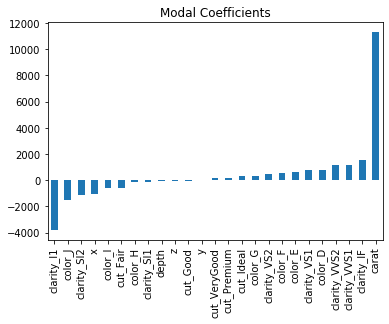

In [70]:
predictors = x_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [74]:
# Şimdi Katsayıları kontrol edelim bakalım nasıl bir korelasyon ilişkileri var.
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,carat,11284.854433
1,depth,-48.076363
2,x,-1028.135051
3,y,4.687041
4,z,-41.179665
5,cut_Fair,-624.390678
6,cut_Good,-20.261766
7,cut_Ideal,316.182538
8,cut_Premium,174.150298
9,cut_VeryGood,154.319608


In [75]:
x_train.shape


(43152, 25)

In [76]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)
ridgeReg.score(x_cv, y_cv)

0.900986320067772

In [77]:
mse

1551690.6428034387

In [78]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)

ridgeReg.score(x_cv, y_cv)

0.8451301515807662

In [79]:
mse

2427039.3223340223

In [80]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)
ridgeReg.score(x_cv, y_cv)

0.5493083929695151

In [81]:
mse

7063003.313258549

In [82]:
from sklearn.linear_model import Ridge

##training the model

ridgeReg = Ridge(alpha=100, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

##calculating mse

mse = np.mean((pred - y_cv)**2)
ridgeReg.score(x_cv, y_cv)

0.059971539996235945

In [83]:
mse

14731634.723152975

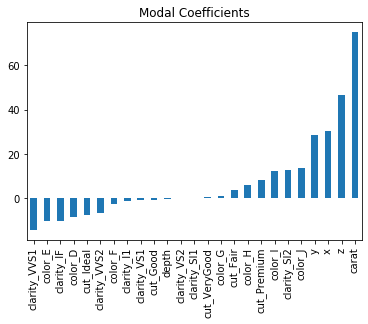

In [84]:
predictors = x_train.columns

coef = Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [85]:
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(ridgeReg.coef_)

coeff

,0,Coefficient Estimate
0,carat,74.734896
1,depth,-0.273319
2,x,30.241379
3,y,28.713035
4,z,46.426680
5,cut_Fair,3.964890
6,cut_Good,-0.796995
7,cut_Ideal,-7.430713
8,cut_Premium,8.425959
9,cut_VeryGood,0.682797


In [86]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.05, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)



lassoReg.score(x_cv,y_cv)

0.916400238785894

In [87]:
mse

1310131.7646745406

In [88]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)



lassoReg.score(x_cv,y_cv)

0.8992647695145602

In [89]:
mse

1578669.883312021

In [90]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=5, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)



lassoReg.score(x_cv,y_cv)

0.7775798916683994

In [91]:
mse

3485651.6908138515

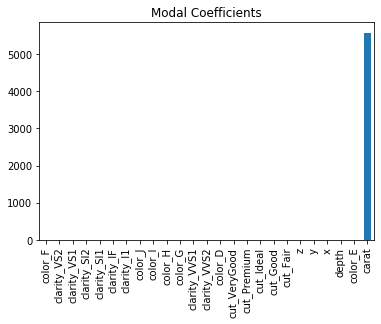

In [92]:
predictors = x_train.columns

coef = Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [93]:
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lassoReg.coef_)

coeff

,0,Coefficient Estimate
0,carat,5575.007018
1,depth,-0.000000
2,x,0.000000
3,y,0.000000
4,z,0.000000
5,cut_Fair,-0.000000
6,cut_Good,-0.000000
7,cut_Ideal,0.000000
8,cut_Premium,0.000000
9,cut_VeryGood,0.000000


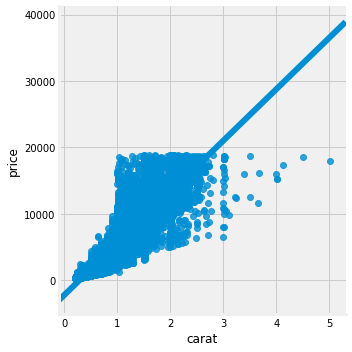

In [128]:
 sns.lmplot(x="carat", y="price", data=train)